<a href="https://colab.research.google.com/github/juliaovv/Project-ML/blob/main/Kopia_notatnika_etap3_red_wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
wine=pd.read_csv("winequality-red.csv",  sep=";")
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   object 
 3   residual sugar        1599 non-null   object 
 4   chlorides             1599 non-null   object 
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1595 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB
None


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine = wine.drop_duplicates()

In [ ]:
columnstochange = ['citric acid','residual sugar','chlorides']

In [ ]:
wine.shape

(1363, 12)

In [ ]:
for x in columnstochange:
  wine[x] = wine[x].str.replace('_','')

In [ ]:
for column in columnstochange:
  wine[column] = pd.to_numeric(wine[column], errors='coerce')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1363 non-null   float64
 1   volatile acidity      1363 non-null   float64
 2   citric acid           1363 non-null   float64
 3   residual sugar        1363 non-null   float64
 4   chlorides             1363 non-null   float64
 5   free sulfur dioxide   1363 non-null   float64
 6   total sulfur dioxide  1363 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1363 non-null   float64
 9   sulphates             1363 non-null   float64
 10  alcohol               1363 non-null   float64
 11  quality               1363 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.4 KB


In [ ]:
#zamiana wartości ujemnych na ich przeciwności
def replace_negative_with_opposite(x):
  if isinstance(x, str):
        x = int(x)
  if x < 0:
        return -x
  else:
        return x
for column in wine.columns:
  wine = wine.applymap(replace_negative_with_opposite)

#uzupełnienie braków danych numerycznych średnią
mean_values = wine.mean()
wine.fillna(mean_values, inplace=True)

In [ ]:
wine.head(1596)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Usunięcie zmiennych odstających
for y in wine.columns:
  Q1 = wine[y].quantile(0.25)
  Q3 = wine[y].quantile(0.75)
  IQR = Q3 - Q1
  wine = wine.drop(wine.loc[wine[y] > (Q3 + 1.5 * IQR)].index)
  wine = wine.drop(wine.loc[wine[y] < (Q1 - 1.5 * IQR)].index)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#zmiana na rozkład normalny
scaler = MinMaxScaler()


for i in wine.columns:
    wine[i] = scaler.fit_transform(wine[[i]].values.reshape(-1, 1))

wine.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.319444,0.651685,0.000000,0.285714,0.457831,0.256410,0.259259,0.6750,0.757143,0.377049,0.148936,0.333333
1,0.375000,0.853933,0.000000,0.571429,0.722892,0.615385,0.564815,0.5500,0.314286,0.573770,0.234043,0.333333
2,0.375000,0.719101,0.054795,0.448980,0.650602,0.358974,0.444444,0.5750,0.400000,0.524590,0.234043,0.333333
3,0.847222,0.179775,0.767123,0.285714,0.445783,0.410256,0.500000,0.7000,0.257143,0.409836,0.234043,0.666667
5,0.319444,0.606742,0.000000,0.244898,0.445783,0.307692,0.314815,0.6750,0.757143,0.377049,0.148936,0.333333
6,0.388889,0.539326,0.082192,0.163265,0.373494,0.358974,0.490741,0.5000,0.457143,0.213115,0.148936,0.333333
7,0.305556,0.595506,0.000000,0.000000,0.325301,0.358974,0.138889,0.2750,0.585714,0.229508,0.276596,1.000000
8,0.375000,0.516854,0.027397,0.326531,0.421687,0.205128,0.111111,0.5500,0.542857,0.393443,0.170213,1.000000
10,0.222222,0.516854,0.109589,0.244898,0.710843,0.358974,0.546296,0.4375,0.428571,0.344262,0.106383,0.333333
12,0.069444,0.556180,0.000000,0.163265,0.614458,0.384615,0.490741,0.2375,0.857143,0.311475,0.255319,0.333333


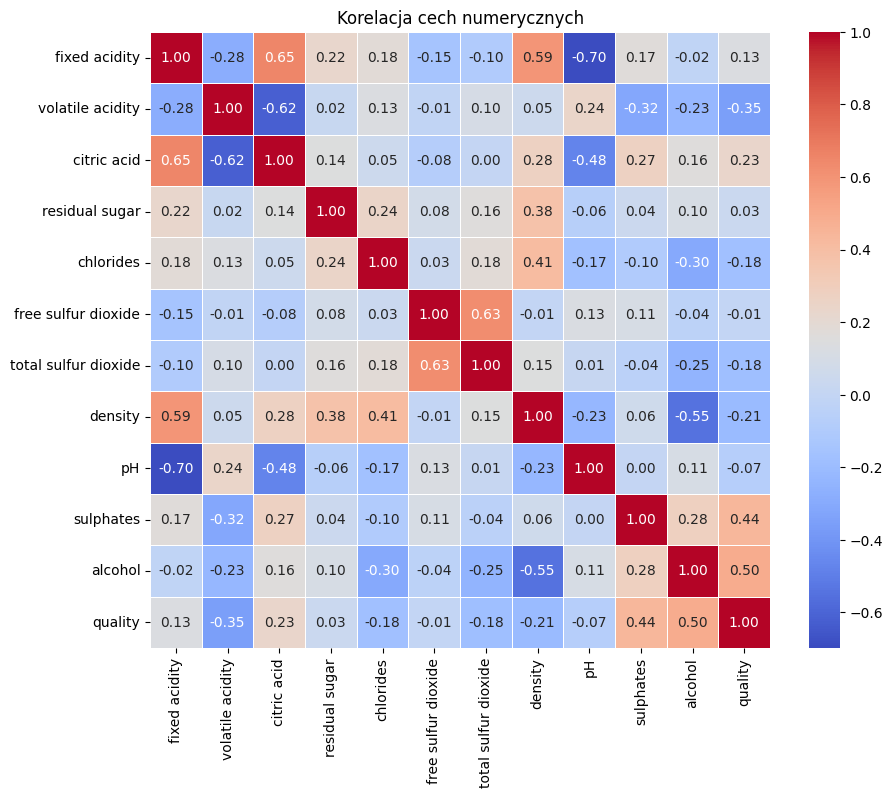

In [ ]:
#wygenerowanie heatmapy korelacji cech numerycznych
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot = True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Korelacja cech numerycznych')
plt.show()

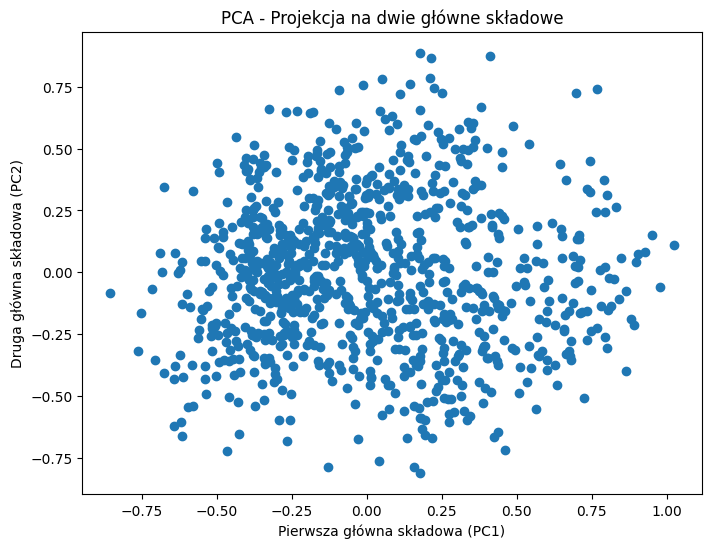

In [ ]:
from sklearn.decomposition import PCA

#wybranie kolumn numerycznych (z wyłączeniem celu)
features = wine.drop(columns=['quality'])

#wykonanie PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Pierwsza główna składowa (PC1)')
plt.ylabel('Druga główna składowa (PC2)')
plt.title('PCA - Projekcja na dwie główne składowe')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#podział danych

#train_wine, test_wine = train_test_split(wine ,test_size=0.3, random_state=42)
#X_train = train_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]]
#Y_train = train_wine["quality"]
#X_test = test_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]]
#Y_test = test_wine["quality"]

X = wine.drop(columns='quality')
Y = wine['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# REGRESJA LINIOWA

In [ ]:
#MODEL PODSTAWOWY - regresja liniowa

model=LinearRegression().fit(X_train,Y_train)
model.score(X_train,Y_train)
print("Coef: ",model.coef_)
print("Intercept: ",model.intercept_)
Y_pred = model.predict(X_test)

Coef:  [ 0.20265337 -0.22537176 -0.08314016 -0.01566463  0.03534862 -0.00414566
 -0.01572783 -0.17255677 -0.05574449  0.39491151  0.40141537]
Intercept:  0.362935379841688


In [ ]:
#Średni błąd bezwzględny
from sklearn.metrics import mean_absolute_error
print("Średni błąd bezwzględny: ",mean_absolute_error(Y_test,Y_pred))

Średni błąd bezwzględny:  0.16099315033010184


In [ ]:
#Mediana błędu bezwzględnego:
from sklearn.metrics import median_absolute_error
print("Mediana błędu bezwzględnego: ",median_absolute_error(Y_test,Y_pred))

Mediana błędu bezwzględnego:  0.13107126401626762


In [ ]:
#R kwadrat
from sklearn.metrics import r2_score
print("R kwadrat: ",r2_score(Y_test,Y_pred))

#wniosek: słabe dopasowanie

R kwadrat:  0.3331863460525051


In [ ]:
#Średni błąd kwadratowy
from sklearn.metrics import mean_squared_error
print("Średni błąd kwadratowy: ",mean_squared_error(Y_test, Y_pred))

Średni błąd kwadratowy:  0.03926184640840372


In [ ]:
#Błąd średniokwadratowy
print("Błąd średniokwadratowy:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

Błąd średniokwadratowy: 0.19814602294369604


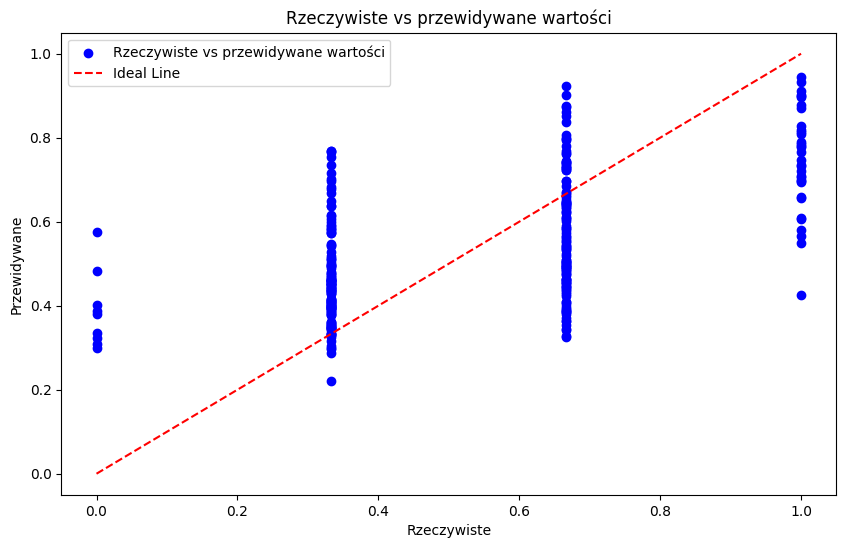

In [ ]:
import matplotlib.pyplot as plt

#wykres rzeczywiste vs przewidywane wartości
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()
#wniosek: słabe dopasowanie modelu

In [ ]:
#cross validation
from sklearn.model_selection import RepeatedKFold, cross_val_score

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=rkf,scoring='neg_mean_absolute_error')
print(cv_scores)

[-0.15687835 -0.16090959 -0.1507755  -0.14795921 -0.16148023 -0.1491355
 -0.1623042  -0.15348525 -0.15623667 -0.15495273 -0.14432358 -0.16309528
 -0.14466825 -0.16176226 -0.16663021]


# WIELOMIANOWY 2 STOPNIA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Polynomial Regression Degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

X_train_poly_2, X_test_poly_2, Y_train_poly_2, Y_test_poly_2 = train_test_split(X_poly_2, Y, test_size=0.3, random_state=42)
model_poly_2 = LinearRegression().fit(X_train_poly_2, Y_train_poly_2)
Y_pred_poly_2 = model_poly_2.predict(X_test_poly_2)

print("Polynomial Regression Degree 2 Metrics:")
print("Mean Absolute Error: ", mean_absolute_error(Y_test_poly_2, Y_pred_poly_2))
print("Median Absolute Error: ", median_absolute_error(Y_test_poly_2, Y_pred_poly_2))
print("R^2: ", r2_score(Y_test_poly_2, Y_pred_poly_2))
print("Mean Squared Error: ", mean_squared_error(Y_test_poly_2, Y_pred_poly_2))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test_poly_2, Y_pred_poly_2)))

# Cross-validation for Polynomial Regression Degree 2
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_poly_2 = cross_val_score(model_poly_2, X_poly_2, Y, cv=rkf, scoring='neg_mean_absolute_error')
print("Cross-validation scores (Polynomial Regression Degree 2):", cv_scores_poly_2)


Polynomial Regression Degree 2 Metrics:
Mean Absolute Error:  0.16488823561944924
Median Absolute Error:  0.13922315750240655
R^2:  0.31278794384434894
Mean Squared Error:  0.04046290000071143
Root Mean Squared Error:  0.20115392116663156
Cross-validation scores (Polynomial Regression Degree 2): [-0.15870356 -0.16732097 -0.16288828 -0.15906488 -0.15790905 -0.1563796
 -0.17124799 -0.15341008 -0.16047673 -0.15460622 -0.15254103 -0.17414203
 -0.15124985 -0.16620995 -0.16491811]


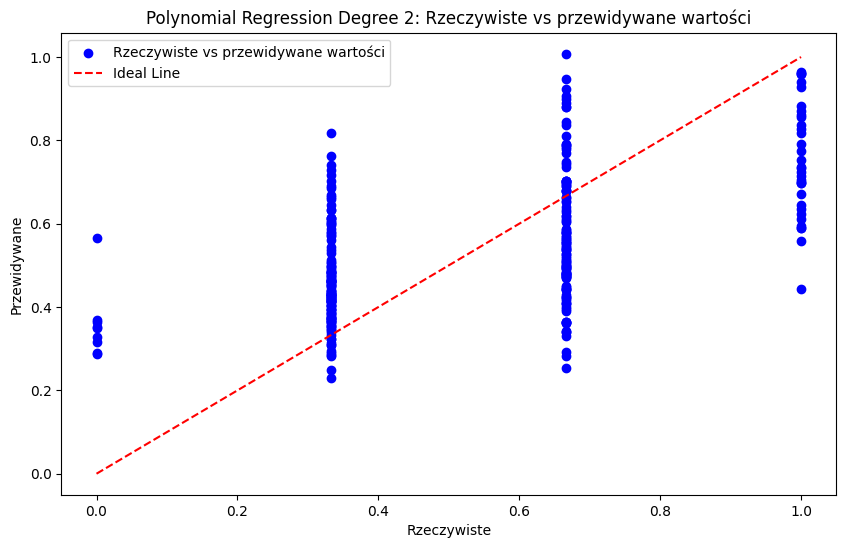

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Polynomial Regression Degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

X_train_poly_2, X_test_poly_2, Y_train_poly_2, Y_test_poly_2 = train_test_split(X_poly_2, Y, test_size=0.3, random_state=42)
model_poly_2 = LinearRegression().fit(X_train_poly_2, Y_train_poly_2)
Y_pred_poly_2 = model_poly_2.predict(X_test_poly_2)

# Scatter plot for Polynomial Regression Degree 2
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_poly_2, Y_pred_poly_2, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test_poly_2.min(), Y_test_poly_2.max()], [Y_test_poly_2.min(), Y_test_poly_2.max()], '--', color='red', label='Ideal Line')
plt.title('Polynomial Regression Degree 2: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()


# WIELOMIANOWY 3 STOPNIA

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score

# Polynomial Regression Degree 3
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)

X_train_poly_3, X_test_poly_3, Y_train_poly_3, Y_test_poly_3 = train_test_split(X_poly_3, Y, test_size=0.3, random_state=42)
model_poly_3 = LinearRegression().fit(X_train_poly_3, Y_train_poly_3)
Y_pred_poly_3 = model_poly_3.predict(X_test_poly_3)

print("Polynomial Regression Degree 3 Metrics:")
print("Mean Absolute Error: ", mean_absolute_error(Y_test_poly_3, Y_pred_poly_3))
print("Median Absolute Error: ", median_absolute_error(Y_test_poly_3, Y_pred_poly_3))
print("R^2: ", r2_score(Y_test_poly_3, Y_pred_poly_3))
print("Mean Squared Error: ", mean_squared_error(Y_test_poly_3, Y_pred_poly_3))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test_poly_3, Y_pred_poly_3)))

# Cross-validation for Polynomial Regression Degree 3
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_poly_3 = cross_val_score(model_poly_3, X_poly_3, Y, cv=rkf, scoring='neg_mean_absolute_error')
print("Cross-validation scores (Polynomial Regression Degree 3):", cv_scores_poly_3)


Polynomial Regression Degree 3 Metrics:
Mean Absolute Error:  0.26293805328196274
Median Absolute Error:  0.2029791859872503
R^2:  -1.1912412669040213
Mean Squared Error:  0.12901982068848858
Root Mean Squared Error:  0.3591932915415996
Cross-validation scores (Polynomial Regression Degree 3): [-0.22644243 -0.25574463 -0.25375002 -0.27823433 -0.20775027 -0.20661041
 -0.24384511 -0.19943725 -0.22558515 -0.22523481 -0.23471814 -0.22590533
 -0.21901617 -0.26158187 -0.23229556]


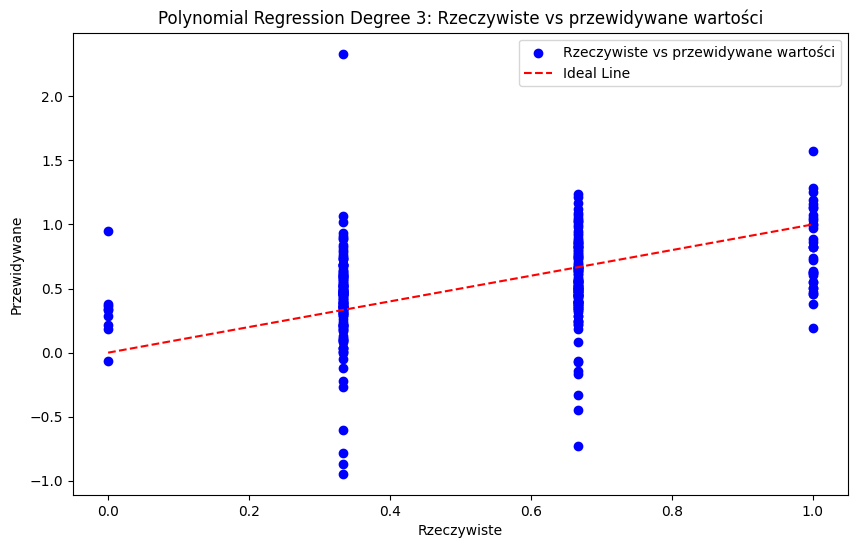

In [ ]:
# Polynomial Regression Degree 3
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)

X_train_poly_3, X_test_poly_3, Y_train_poly_3, Y_test_poly_3 = train_test_split(X_poly_3, Y, test_size=0.3, random_state=42)
model_poly_3 = LinearRegression().fit(X_train_poly_3, Y_train_poly_3)
Y_pred_poly_3 = model_poly_3.predict(X_test_poly_3)

# Scatter plot for Polynomial Regression Degree 3
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_poly_3, Y_pred_poly_3, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test_poly_3.min(), Y_test_poly_3.max()], [Y_test_poly_3.min(), Y_test_poly_3.max()], '--', color='red', label='Ideal Line')
plt.title('Polynomial Regression Degree 3: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()


# KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
import pandas as pd
import numpy as np

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors Regression Metrics:")
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred_knn))
print("Median Absolute Error: ", median_absolute_error(Y_test, Y_pred_knn))
print("R^2: ", r2_score(Y_test, Y_pred_knn))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))

# Cross-validation for K-Nearest Neighbors Regression
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_knn = cross_val_score(knn_model, X, Y, cv=rkf, scoring='neg_mean_absolute_error')
print("Cross-validation scores (K-Nearest Neighbors Regression):", cv_scores_knn)


K-Nearest Neighbors Regression Metrics:
Mean Absolute Error:  0.17029478458049888
Median Absolute Error:  0.13333333333333336
R^2:  0.24388263033796154
Mean Squared Error:  0.04452003023431595
Root Mean Squared Error:  0.21099770196453788
Cross-validation scores (K-Nearest Neighbors Regression): [-0.16258503 -0.17142857 -0.16512821 -0.16615385 -0.16923077 -0.15748299
 -0.18367347 -0.16717949 -0.15965812 -0.16649573 -0.1462585  -0.16938776
 -0.1582906  -0.17333333 -0.18324786]


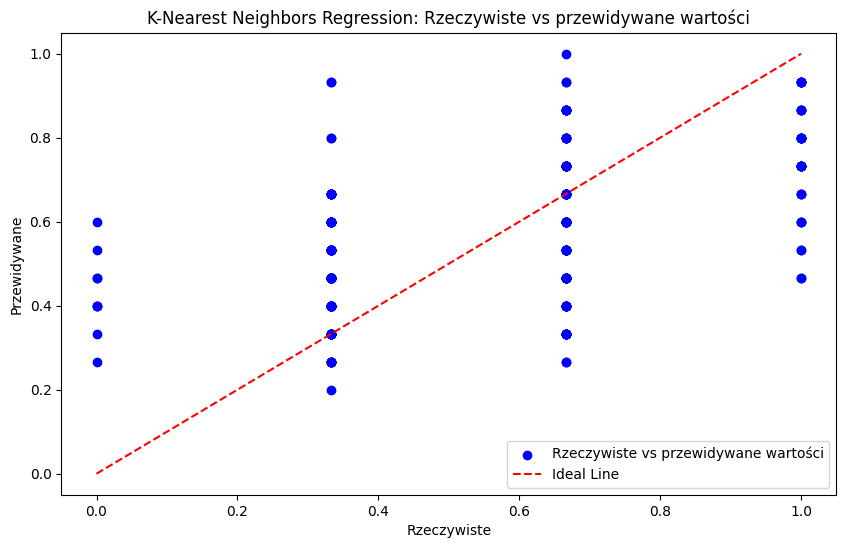

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

# Scatter plot for K-Nearest Neighbors Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_knn, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('K-Nearest Neighbors Regression: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()


# HUBERA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Huber Regression
huber_model = HuberRegressor()
huber_model.fit(X_train, Y_train)
Y_pred_huber = huber_model.predict(X_test)

print("Huber Regression Metrics:")
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred_huber))
print("Median Absolute Error: ", median_absolute_error(Y_test, Y_pred_huber))
print("R^2: ", r2_score(Y_test, Y_pred_huber))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred_huber))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, Y_pred_huber)))

# Cross-validation for Huber Regression
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_huber = cross_val_score(huber_model, X, Y, cv=rkf, scoring='neg_mean_absolute_error')
print("Cross-validation scores (Huber Regression):", cv_scores_huber)


Huber Regression Metrics:
Mean Absolute Error:  0.15962340427865124
Median Absolute Error:  0.1372303520799778
R^2:  0.32913635359800486
Mean Squared Error:  0.039500309104484474
Root Mean Squared Error:  0.19874684677872118
Cross-validation scores (Huber Regression): [-0.1564407  -0.15922998 -0.15027369 -0.14755307 -0.16060929 -0.1475522
 -0.1612051  -0.15230244 -0.15829021 -0.15291971 -0.14490396 -0.16342458
 -0.14399117 -0.1604715  -0.16641922]


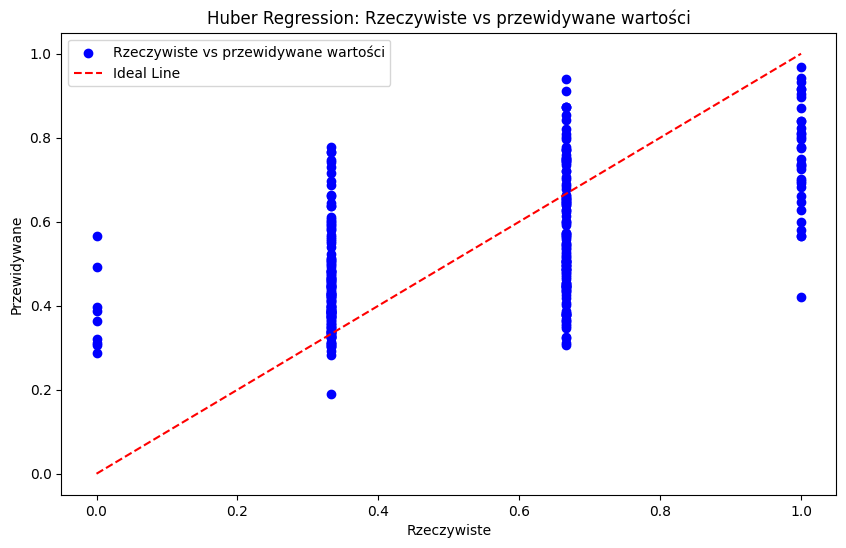

In [ ]:
from sklearn.linear_model import HuberRegressor

# Huber Regression
huber_model = HuberRegressor()
huber_model.fit(X_train, Y_train)
Y_pred_huber = huber_model.predict(X_test)

# Scatter plot for Huber Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_huber, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Huber Regression: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()


# LINIOWA

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

print("Linear Regression Metrics:")
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred_linear))
print("Median Absolute Error: ", median_absolute_error(Y_test, Y_pred_linear))
print("R^2: ", r2_score(Y_test, Y_pred_linear))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred_linear))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, Y_pred_linear)))

# Cross-validation for Linear Regression
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_linear = cross_val_score(linear_model, X, Y, cv=rkf, scoring='neg_mean_absolute_error')
print("Cross-validation scores (Linear Regression):", cv_scores_linear)


Linear Regression Metrics:
Mean Absolute Error:  0.16099315033010184
Median Absolute Error:  0.13107126401626762
R^2:  0.3331863460525051
Mean Squared Error:  0.03926184640840372
Root Mean Squared Error:  0.19814602294369604
Cross-validation scores (Linear Regression): [-0.15687835 -0.16090959 -0.1507755  -0.14795921 -0.16148023 -0.1491355
 -0.1623042  -0.15348525 -0.15623667 -0.15495273 -0.14432358 -0.16309528
 -0.14466825 -0.16176226 -0.16663021]


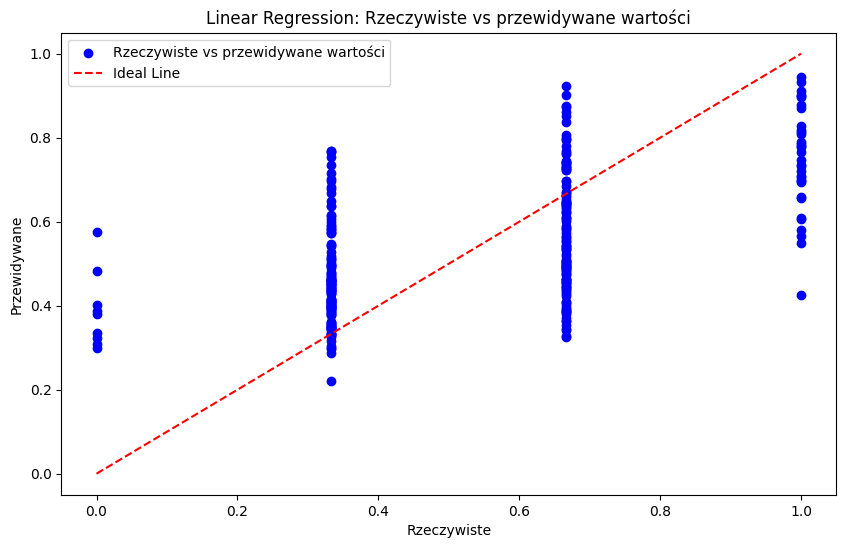

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_linear, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Linear Regression: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()


# RANDOM FOREST

Cross-validated R^2 scores:  [0.3656, 0.3243, 0.3632, 0.3422, 0.2146, 0.3684, 0.2931, 0.3102, 0.3001, 0.3902, 0.338, 0.3474, 0.3032, 0.3575, 0.3437]
Mean R^2 from CV:  0.3308
Standard Deviation of R-squared from CV (RMSE): 0.1942
RandomForestRegressor R2: 0.3596


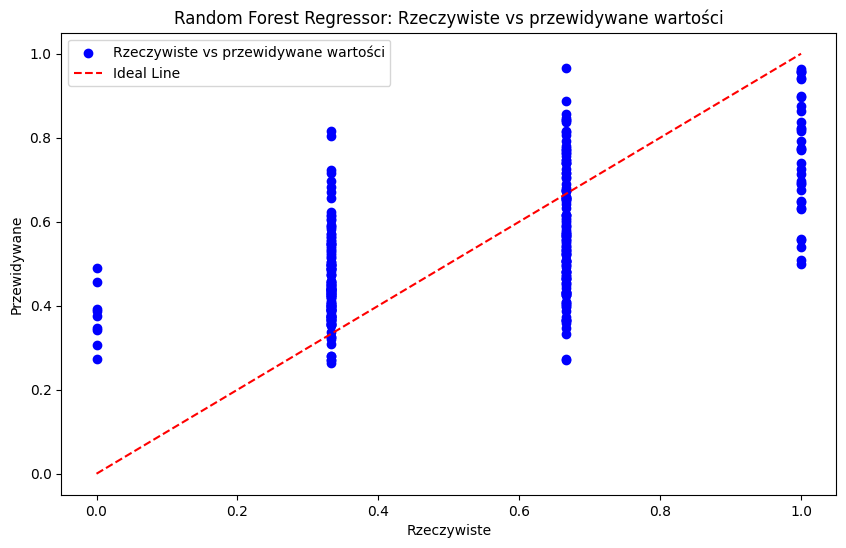

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RepeatedKFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Regressor
model_rf_regressor = RandomForestRegressor(random_state=42)
model_rf_regressor.fit(X_train, Y_train)
predictions_rf_regressor = model_rf_regressor.predict(X_test)

# Cross-validation for Random Forest Regressor
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores_rf_regressor = cross_val_score(estimator=model_rf_regressor, X=X_train, y=Y_train, cv=rkf, scoring='r2')
rmse_rf_regressor = np.sqrt(mean_squared_error(Y_test, predictions_rf_regressor))
r2_rf_regressor = model_rf_regressor.score(X_test, Y_test)

print("Cross-validated R^2 scores: ", list(map(lambda x: round(x, 4), cv_scores_rf_regressor)))
print("Mean R^2 from CV: ", round(cv_scores_rf_regressor.mean(), 4))
print("Standard Deviation of R-squared from CV (RMSE):", round(rmse_rf_regressor, 4))
print('RandomForestRegressor R2:', round(r2_rf_regressor, 4))

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions_rf_regressor, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Random Forest Regressor: Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()
